Homework 2 --- Christopher Cook --- *Predicting with Kaggle!*

Hello! I'm going to show you how to use machine learning to predict house values using a dataset from kaggle. First we need to import pandas and open the dataset.

In [116]:
import pandas as pd

In [117]:
train = pd.read_csv('C:/users/Christopher Cook/Downloads/kaggle/train.csv')

Let's take a peek at what we're dealing with.

In [118]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It looks like we've got a bunch of categorical variables as well as several integar valued variables as well. The time variables are ints, and so I'm going to convert them into strings so that get_dummies knows that they're categorical.

In [119]:
#convert to strings
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].apply(str)
train['YearBuilt'] = train['YearBuilt'].apply(str)
train['YearRemodAdd'] = train['YearRemodAdd'].apply(str)
train['MoSold'] = train['MoSold'].apply(str)

Next we have to deal with the variables where a missing value means something. I went through the key, and inferred which variables are like this. Most of these treated missing as another value. 

In [120]:
#create dict for categorical missing values i.e. missing means something
missing_fill = {'MSSubClass' : 'None','MSZoning' : 'None', 'Alley' : 'None', 'BsmtQual' : 'None', 'BsmtCond' : 'None',  'BsmtExposure' : 'None', 'BsmtFinType1' : 'None', 'BsmtFinType2': 'None', 'Functional': 'Typ', 'FireplaceQu' : 'None', 'GarageType': 'None', 'GarageYrBlt': 'None', 'GarageFinish': 'None', 'GarageCars': 'None', 'GarageQual': 'None', 'GarageCond' : 'None', 'PoolQC': 'None', 'Fence' : 'None', 'MiscFeature' : 'None'}


In [121]:
#fill missing values with specified dict values
train = train.fillna(missing_fill)

Next, as best as I can tell, the other variables were missing because of incedential reasons. I decided the best way to deal with this is to replace missing data from one row with data from the row above, after randomly shuffling the data.

In [122]:
#The other variables are missing for incedential reasons. That is I don't think that a missing value means anything. Hence, they
#are being replaced with the variable before it.
train = train.sample(frac=1).reset_index(drop=True)
train = train.fillna(method='ffill')

Let's take a peek again at the data.

In [123]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1128,20,RL,182.0,14572,Pave,None,IR3,Lvl,AllPub,...,0,None,None,None,0,11,2007,WD,Family,259000
1,1182,120,RM,64.0,5587,Pave,None,IR1,HLS,AllPub,...,0,None,None,None,0,11,2008,New,Partial,392500
2,171,50,RM,64.0,12358,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,128500
3,195,20,RL,60.0,7180,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,5,2008,WD,Normal,127000
4,1388,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,AllPub,...,0,None,GdWo,None,0,8,2007,CWD,Family,136000


Looks great! Let's create some dummies, normalize our numerical data and get on to the models!

In [129]:
#Listing Numerical data
numericals = {'LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','OverallQual', 'OverallCond', 'GarageCars', 'SalePrice'}

#Get Dummies. Though it wasn't neccesary I removed the numericals from dummies list entirely
dum_train = pd.get_dummies(train.drop(labels=(numericals), axis=1), drop_first=True)

#Need to store saleprice SDev and mean for later
mean = train['SalePrice'].mean()
std = train['SalePrice'].std()

#Here I add a normalized version of my numerical variables
for name in numericals:
    dum_train[name] = (train[name] - train[name].mean()) / train[name].std()

Now we move on to the models. Below, you can see the remnants of my brainstorming. In the end I decided to use Linear regression (with ridge and lasso), SVR and Random Forest. 

In [130]:
#What Models do we want to test?
'''
Random Forest
Linear/Ridge
SVR
'''

X = dum_train.drop(['SalePrice', 'Id'], axis=1).values
y = dum_train['SalePrice'].values


Here I fit the linear (OLS), Ridge and Lasso models, using a gridsearch for optimal parameters, as necessary. Interestingly enough, OLS seems to have done the best of the three. 

In [131]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X,y)
print('Score: ' + str(linear.score(X,y)))

Score: 0.946856879631


In [132]:
from sklearn.model_selection import GridSearchCV
lass = linear_model.Lasso()
gr_lass = GridSearchCV(lass,{'alpha' : [0.001,0.01,0.1,1,10,100]}) #Note here: Didn't include 0.0001 because of convergence issues
gr_lass.fit(X,y)
print(gr_lass.best_estimator_)
print('Best Score: ' + str(gr_lass.score(X,y)))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Score: 0.905103065833


In [128]:
rig = linear_model.Ridge()
gr_rig = GridSearchCV(rig,{'alpha' : [0.001,0.01,0.1,1,10,100]})
gr_rig.fit(X,y)
print(gr_rig.best_estimator_)
print('Best Score: ' + str(gr_rig.score(X,y)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.905241869455


Next I run an SVR model. We can see that this does much better than any of the linear models. 

In [83]:
from sklearn import svm
svr = svm.SVR()
gr_svr = GridSearchCV(svr,{'C' : [0.1,1,10,100], 'epsilon' : [0.01,0.1,1]})
gr_svr.fit(X,y)
print(gr_svr.best_estimator_)
print('Best Score: ' + str(gr_svr.score(X,y)))

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best Score: 0.882274721378


In order to get a feel for which parameters to choose for the Random Forest, I try a Decision Tree Regressor. We get that the best params are max_depth = 40 and min_samples_split = 20.

In [84]:
from sklearn import tree
tr = tree.DecisionTreeRegressor()
gr_tr = GridSearchCV(tr,{'max_depth' : [3,5,10,20,40,80,160], 'min_samples_split' : [2,4,6,8,10,20,40]}, n_jobs=2)
gr_tr.fit(X,y)
print(gr_tr.best_estimator_)
print('Best Score: ' + str(gr_tr.score(X,y)))

DecisionTreeRegressor(criterion='mse', max_depth=80, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=40,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score: 0.887480118056


Since we made the Tree, we may as well print it. This can give us some intution as to what the most important split points are.

In [85]:
tree.export_graphviz(gr_tr.best_estimator_, out_file='C:/users/Christopher Cook/Downloads/tree.dot')

![title](Downloads/tree.png)

I know that's way to big to make out, but you're free to look through it. It unfortunately doesn't give column names, just numbers though.

In [89]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
gr_rf = GridSearchCV(rf,{'n_estimators': [10,100,1000], 'max_depth': [10,20,40], 'min_samples_split' : [2,5,10,20], 'max_features' : ['sqrt']})
gr_rf.fit(X,y)
print(gr_rf.best_estimator_)
print('Best Score: ' + str(gr_rf.score(X,y)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Score: 0.978582703655


Let's get our list of feature importances.

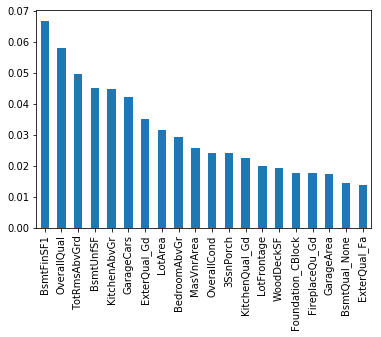

In [91]:
#Get the Feature importantces for the data
%matplotlib inline
feature_imp = sorted(list(zip(list(dum_train.drop(['SalePrice'], axis=1)), gr_rf.best_estimator_.feature_importances_)), key=lambda x: x[1], reverse=True)
ls = pd.Series([x[1] for x in feature_imp], index=[x[0] for x in feature_imp])
ls[0:20].plot(kind='bar')

Now that we've predicted and evaluated our model we can make our predictions and submit them to Kaggle!

In [92]:
test = pd.read_csv('C:/users/Christopher Cook/Downloads/kaggle/test.csv')

Now, we need to make sure to process our data in exactly the same way, or we might have problems. Below I've simply copied my code from above and replaced train with test, and removed references to SalePrice

In [112]:
#convert to strings
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].apply(str)
test['YearBuilt'] = test['YearBuilt'].apply(str)
test['YearRemodAdd'] = test['YearRemodAdd'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)

#create dict for categorical missing values i.e. missing means something
missing_fill = {'MSSubClass' : 'None','MSZoning' : 'None', 'Alley' : 'None', 'BsmtQual' : 'None', 'BsmtCond' : 'None',  'BsmtExposure' : 'None', 'BsmtFinType1' : 'None', 'BsmtFinType2': 'None', 'Functional': 'Typ', 'FireplaceQu' : 'None', 'GarageType': 'None', 'GarageYrBlt': 'None', 'GarageFinish': 'None', 'GarageCars': 0, 'GarageQual': 'None', 'GarageCond' : 'None', 'PoolQC': 'None', 'Fence' : 'None', 'MiscFeature' : 'None'}

#fill missing values with specified dict values
test = test.fillna(missing_fill)

#The other variables are missing for incedential reasons. That is I don't think that a missing value means anything. Hence, they
#are being replaced with the variable before it.
test = test.sample(frac=1).reset_index(drop=True)
test = test.fillna(method='ffill')
test = test.fillna(method='bfill')

#Listing Numerical data
numericals = {'LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','OverallQual', 'OverallCond', 'GarageCars', 'Id'}

#This shouldn't be necessary but aparently it is
test['GarageCars'] = pd.to_numeric(test['GarageCars'])

#Get Dummies. Though it wasn't neccesary I removed the numericals from dummies list entirely
dum_test = pd.get_dummies(test.drop(labels=(numericals), axis=1), drop_first=True)

#Here I add a normalized version of my numerical variables
for name in numericals:
    if name == 'Id':
        dum_test[name] = test[name]
    else:
        dum_test[name] = (test[name] - test[name].mean()) / test[name].std()

Random tree was clearly the best model, so we will use it to predict our results on Kaggle.

In [135]:
#predicting best results
temp1 = dum_train.drop(['SalePrice', 'Id'], axis=1)
temp2 = dum_test.drop(['Id'], axis=1)

for var in set(temp1.columns).difference(set(temp2.columns)):
    temp2[var] = 0
for var in set(temp2.columns).difference(set(temp1.columns)):
    temp2 = temp2.drop([var],axis=1)
        
        
dum_test['pred'] = gr_rf.predict(temp2.values)

out = dum_test[['Id','pred']]
out = out.sort_values('Id')

#Denormalize Sales
out['pred'] = out['pred'] * std + mean
out.head(5)

,Id,pred
82,1461,173820.129
1154,1462,187009.732
701,1463,170808.188
1438,1464,173206.396
511,1465,183781.284


Our out dataframe looks great so we're going to save and submit to kaggle

In [136]:
out.to_csv('C:/users/Christopher Cook/Downloads/kaggle/predict.csv')